## 3.5. plot GO terms pseudotime patterns

In this notebook we will plot the GO terms that we found in R script 3.4. If you don't want to run that script first, you can also use the file `results/pseudotime/pseudotime_patterns_GO_terms.xlsx` on the Github repository.


In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import math

### Load data

Here, we load the GO terms from the patterns of interest.

In [2]:
all_GO_terms = {}

for pattern in range(1,17):
    pattern = str(pattern)
    GO_terms_path = "../results/pseudotime/pseudotime_patterns_GO_terms.xlsx"
    try:
        GO_terms = pd.read_excel (GO_terms_path, 
                                  sheet_name='pattern_'+pattern, index_col=0)
        all_GO_terms[pattern] = GO_terms
    except:
            continue

In [3]:
### view content 
all_GO_terms['14'][0:10]

,GO.ID,Term,Annotated,Significant,Expected,KS,genes
1,GO:0006909,phagocytosis,9,3,0.41,0.0055,"Irf8,Pld4,Tyrobp"
2,GO:0034330,cell junction organization,9,3,0.41,0.0055,"Cldn13,Csf1r,Ppfia4"
3,GO:0045216,cell-cell junction organization,3,2,0.14,0.0056,"Cldn13,Csf1r"
4,GO:0061515,myeloid cell development,4,2,0.18,0.0110,"Rhd,Tyrobp"
5,GO:0030099,myeloid cell differentiation,23,4,1.04,0.0152,"Csf1r,Irf8,Rhd,Tyrobp"
6,GO:0045672,positive regulation of osteoclast differentiation,5,2,0.23,0.0178,"Csf1r,Tyrobp"
7,GO:0009611,response to wounding,14,3,0.63,0.0207,"F13a1,Tspan8,Tyrobp"
8,GO:0048871,multicellular organismal homeostasis,14,3,0.63,0.0207,"Csf1r,Ctsh,Rhd"
9,GO:0001894,tissue homeostasis,6,2,0.27,0.0260,"Csf1r,Ctsh"
10,GO:0007596,blood coagulation,6,2,0.27,0.0260,"F13a1,Tspan8"


### Plot GO terms

Here we will plot the GO terms of the selected patterns and their assigned p-value.

In [4]:
### function to get the p-values of selected GO terms
def get_go_p_values(group="1", GO_idx=[0,1,2]):
    
    go_p_values = all_GO_terms[group].loc[GO_idx,"KS"].values
    go_p_values = -np.log10(go_p_values)
    
    go_terms = all_GO_terms[group].loc[GO_idx,"Term"].values
    go_p_values = pd.Series(go_p_values)
    go_p_values.index = go_terms
    
    return go_p_values

In [5]:
### get the p-values from pre-selected GO terms
p_values = {}

# pattern 1
GO_selected = [8,13,15,23,25,30,33,40]
p_values["1"] = get_go_p_values("1", GO_idx=GO_selected)

# pattern 3
GO_selected = [3,11,15,16,18,21,25,26]
p_values["3"] = get_go_p_values("3", GO_idx=GO_selected)

# pattern 7
GO_selected = [4,12,16,18,19,21,22,24]
p_values["7"] = get_go_p_values("7", GO_idx=GO_selected)

# pattern 14
GO_selected = [1,4,5,9,14,20,21,25]
p_values["14"] = get_go_p_values("14", GO_idx=GO_selected)

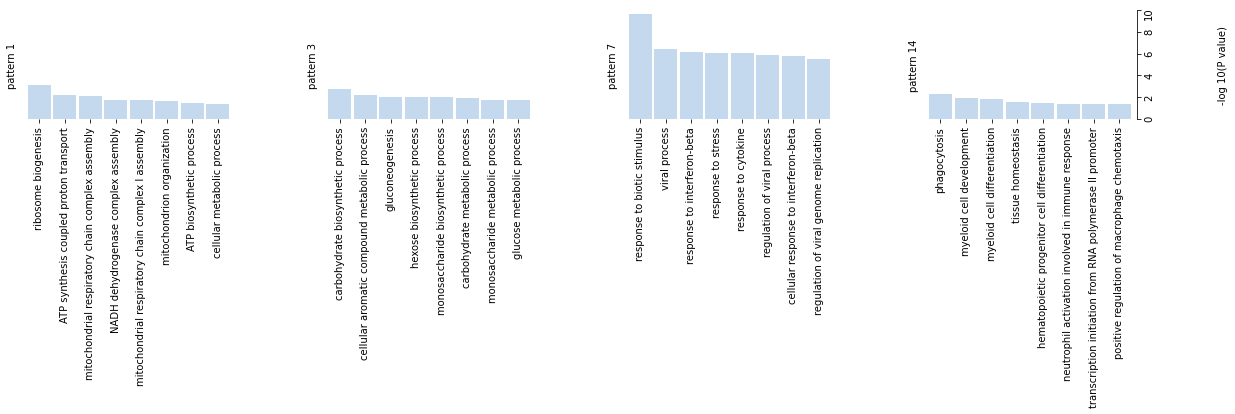

In [6]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, len(p_values), figsize=(5*len(p_values), 2),
                        gridspec_kw={'wspace':0.4})

axs = axs.ravel()

for idx, key in enumerate(p_values):
    p_values[key].plot(kind="bar", ax=axs[idx], width=0.9, color="#C4D9EE")
    axs[idx].set_ylabel('pattern '+key)

ymin = 0
ymax = int(math.ceil(max([max(p_values[key]) for key in p_values])))
    
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax.yaxis.tick_right()
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

for i in range(len(p_values)-1):
    axs[i].set_yticks([])
    axs[i].spines['right'].set_visible(False)

# add title
plt.text(1.4, 0.5, "-log 10(P value)",ha='center',va='center', 
         transform=ax.transAxes, rotation='vertical')
    
# save figure
save_path = "../figures/3.5.GO-terms_PT_patterns_"+'_'.join(p_values.keys())+".pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

In [7]:
### get the p-values from one pattern 

# select pattern
slct_pattern = "1"
GO_selected = range(1,11) #change to [1,2,3,4,6,7] to select certain GO terms
p_values = get_go_p_values(slct_pattern, GO_idx=GO_selected)

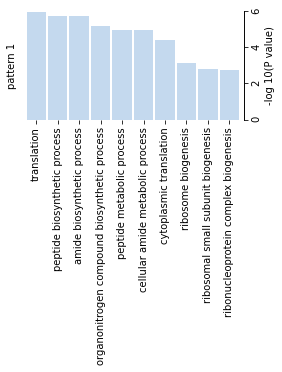

In [8]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, 1, figsize=(0.4*len(p_values), 2),gridspec_kw={'wspace':0})

p_values.plot(kind="bar", ax=axs, width=0.9, color="#C4D9EE")
axs.set_ylabel('pattern '+slct_pattern)

ymin = 0
ymax = int(math.ceil(max(p_values)))

axs.set_ylim([ymin, ymax])
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.set_yticks([])

axs2 = axs.twinx()
axs2.set_ylabel('-log 10(P value)')    
axs2.spines['top'].set_visible(False)
axs2.spines['left'].set_visible(False)
axs2.spines['bottom'].set_visible(False)
axs2.set_ylim([ymin, ymax])
axs2.yaxis.tick_right()

for tick in axs2.get_yticklabels():
    tick.set_rotation(90)
    
# save figure
save_path = "../figures/3.5.GO-terms_PT_patterns_"+slct_pattern+".pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()